In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [6]:
raw_data = pd.read_csv('C://Users//USER//Downloads//students performance.csv')
raw_data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
raw_data.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


In [8]:
raw_data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
data_no_mv = raw_data.dropna(axis=0)
data_no_mv

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [10]:
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

In [11]:
data_no_mv.columns.values

array(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality',
       'School_Type', 'Peer_Influence', 'Physical_Activity',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender', 'Exam_Score'], dtype=object)

In [17]:
# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_no_mv[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality','School_Type', 'Peer_Influence', 'Physical_Activity']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [15]:
vif

""


In [19]:
data_drop=data_no_mv.drop(['Parental_Involvement', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 
                           'Internet_Access', 'Tutoring_Sessions', 'Physical_Activity', 'Parental_Education_Level', 
                           'Distance_from_Home', 'Gender'], axis=1)
data_drop.describe(include='all')

,Hours_Studied,Attendance,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Exam_Score
count,6378.000000,6378.000000,6378,6378,6378,6378,6378,6378,6378,6378.000000
unique,NaN,NaN,3,3,3,3,2,3,2,NaN
top,NaN,NaN,Medium,Medium,Low,Medium,Public,Positive,No,NaN
freq,NaN,NaN,3204,3237,2582,3826,4434,2553,5710,NaN
mean,19.977109,80.020853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.252117
std,5.985460,11.550723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.914217
min,1.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_2432\2037118515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_drop['Hours_Studied'])


<Axes: xlabel='Hours_Studied', ylabel='Density'>

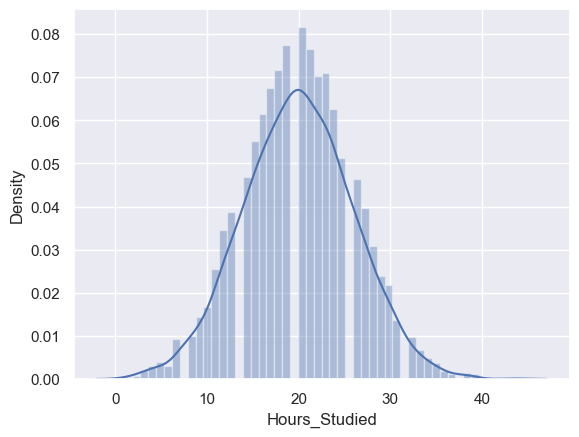

In [20]:
sns.distplot(data_drop['Hours_Studied'])

In [21]:
#data_dummies=pd.get_dummies(data_drop, drop_first=True)

In [22]:
data_dummy=data_drop.copy()

In [23]:

data_dummy['Attendance']
threshold=70


In [24]:
data_dummy['Attendance']=data_dummy['Attendance'].apply(lambda x:1 
                                                        if x >= threshold else 0)
data_dummy

,Hours_Studied,Attendance,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Exam_Score
0,23,1,High,Low,Low,Medium,Public,Positive,No,67
1,19,0,Medium,Low,Medium,Medium,Public,Negative,No,61
2,24,1,Medium,Medium,Medium,Medium,Public,Neutral,No,74
3,29,1,Medium,Medium,Medium,Medium,Public,Negative,No,71
4,19,1,Medium,Medium,Medium,High,Public,Neutral,No,70
...,...,...,...,...,...,...,...,...,...,...
6602,25,0,Medium,Medium,High,Medium,Public,Positive,No,68
6603,23,1,Medium,Medium,Low,High,Public,Positive,No,69
6604,20,1,Low,Low,Low,Medium,Public,Negative,No,68
6605,10,1,High,High,Low,Medium,Private,Positive,No,68


In [25]:
data_dummy['Access_to_Resources']=data_dummy['Access_to_Resources'].map({'High':1, 'Medium':1, 'Low':0})
data_dummy

,Hours_Studied,Attendance,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Exam_Score
0,23,1,1,Low,Low,Medium,Public,Positive,No,67
1,19,0,1,Low,Medium,Medium,Public,Negative,No,61
2,24,1,1,Medium,Medium,Medium,Public,Neutral,No,74
3,29,1,1,Medium,Medium,Medium,Public,Negative,No,71
4,19,1,1,Medium,Medium,High,Public,Neutral,No,70
...,...,...,...,...,...,...,...,...,...,...
6602,25,0,1,Medium,High,Medium,Public,Positive,No,68
6603,23,1,1,Medium,Low,High,Public,Positive,No,69
6604,20,1,0,Low,Low,Medium,Public,Negative,No,68
6605,10,1,1,High,Low,Medium,Private,Positive,No,68


In [26]:
#data_dummy['Access_to_Resources'] = data_dummy['Access_to_Resources'].map({'High':1, 'Medium':1, 'Low':0})
data_dummy['Motivation_Level'] = data_dummy['Motivation_Level'].map({'High':1, 'Medium':1, 'Low':0})
data_dummy['Family_Income'] = data_dummy['Family_Income'].map({'High':1, 'Medium':1, 'Low':0})
data_dummy['Teacher_Quality'] = data_dummy['Teacher_Quality'].map({'High':1, 'Medium':1, 'Low':0})
data_dummy['Peer_Influence'] = data_dummy['Peer_Influence'].map({'Positive':1, 'Negative':0, 'Neutral':0})
data_dummy['School_Type'] = data_dummy['School_Type'].map({'Private':1, 'Public':0})
data_dummy['Learning_Disabilities'] = data_dummy['Learning_Disabilities'].map({'No':1, 'Yes':0})
data_dummy

,Hours_Studied,Attendance,Access_to_Resources,Motivation_Level,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Exam_Score
0,23,1,1,0,0,1,0,1,1,67
1,19,0,1,0,1,1,0,0,1,61
2,24,1,1,1,1,1,0,0,1,74
3,29,1,1,1,1,1,0,0,1,71
4,19,1,1,1,1,1,0,0,1,70
...,...,...,...,...,...,...,...,...,...,...
6602,25,0,1,1,1,1,0,1,1,68
6603,23,1,1,1,0,1,0,1,1,69
6604,20,1,0,0,0,1,0,0,1,68
6605,10,1,1,1,0,1,1,1,1,68


In [27]:
#Declare Inputs and Targets
data_preprocessed = data_dummy.copy()
targets=data_preprocessed['Exam_Score']
inputs=data_preprocessed.drop(['Exam_Score'], axis=1)

In [28]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [29]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

array([[ 0.50507871,  0.55960367,  0.499608  , ..., -0.6621407 ,
         1.22402507,  0.34203471],
       [-0.16325988, -1.78697898,  0.499608  , ..., -0.6621407 ,
        -0.81697673,  0.34203471],
       [ 0.67216335,  0.55960367,  0.499608  , ..., -0.6621407 ,
        -0.81697673,  0.34203471],
       ...,
       [ 0.00382477,  0.55960367, -2.00156924, ..., -0.6621407 ,
        -0.81697673,  0.34203471],
       [-1.66702171,  0.55960367,  0.499608  , ...,  1.51025302,
         1.22402507,  0.34203471],
       [-0.83159847, -1.78697898, -2.00156924, ..., -0.6621407 ,
         1.22402507,  0.34203471]])

In [30]:
#Train Test Split
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split (inputs_scaled, targets, test_size = 0.2, random_state=365)

In [31]:
#Create the Regression
reg=LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [32]:
y_hat=reg.predict(x_train)

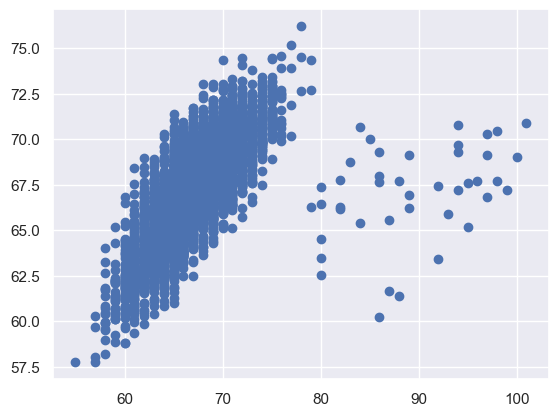

In [33]:
#Create a scatter plot
plt.scatter(y_train, y_hat)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_2432\1164575780.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)


<Axes: xlabel='Exam_Score', ylabel='Density'>

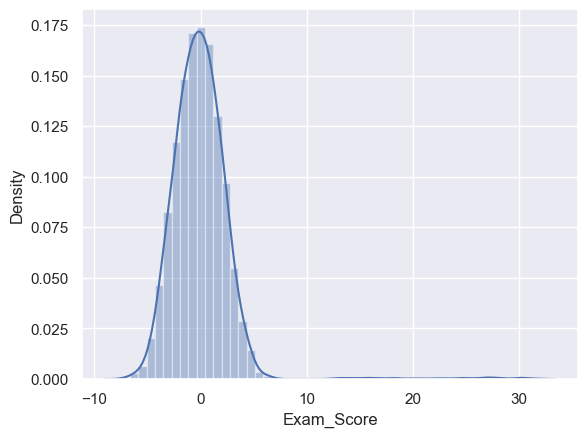

In [34]:
#Residual Plot
# Another useful check is if our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies

sns.distplot(y_train - y_hat)

In [35]:
#R Squared
reg.score(x_train, y_train)

0.43264824412142266

In [36]:
#Finding the weights and bias
reg.intercept_

67.26891229377222

In [37]:
reg.coef_

array([1.74273637, 1.7228263 , 0.55840411, 0.29690838, 0.34028016,
       0.18124734, 0.05208296, 0.3265691 , 0.27091909])

In [38]:
#Summary Table
reg_summary = pd.DataFrame([['intercept'], ['Hours_Studied'], ['Attendance'], ['Access_to_Resources'], ['Motivation_Level'], ['Family_Income'], ['Teacher_Quality'], ['School_Type'], ['Peer_Influence'], ['Learning_Disabilities']], columns=['features'])
reg_summary['weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4], reg.coef_[5], reg.coef_[6], reg.coef_[7], reg.coef_[8]
reg_summary

,features,weights
0,intercept,67.268912
1,Hours_Studied,1.742736
2,Attendance,1.722826
3,Access_to_Resources,0.558404
4,Motivation_Level,0.296908
5,Family_Income,0.340280
6,Teacher_Quality,0.181247
7,School_Type,0.052083
8,Peer_Influence,0.326569
9,Learning_Disabilities,0.270919


In [39]:
#Testing 
y_hat_test=reg.predict(x_test)

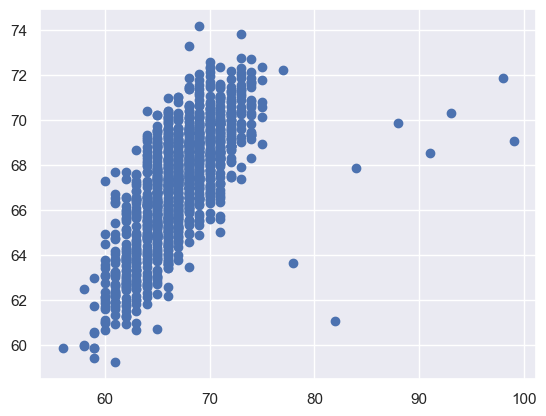

In [40]:
plt.scatter(y_test, y_hat_test)

In [41]:
Data_Pred =pd.DataFrame(y_hat_test, columns=['Prediction'])
Data_Pred.head()

,Prediction
0,64.290218
1,64.481728
2,66.870282
3,68.612723
4,68.524483


In [42]:
Data_Pred['Target']=(y_test.reset_index(drop=True))
Data_Pred

,Prediction,Target
0,64.290218,62
1,64.481728,65
2,66.870282,66
3,68.612723,69
4,68.524483,70
...,...,...
1271,66.820055,63
1272,63.748026,65
1273,64.916939,62
1274,66.512897,67


In [43]:
Data_Pred['Residual']= Data_Pred['Target'] - Data_Pred['Prediction']
Data_Pred

,Prediction,Target,Residual
0,64.290218,62,-2.290218
1,64.481728,65,0.518272
2,66.870282,66,-0.870282
3,68.612723,69,0.387277
4,68.524483,70,1.475517
...,...,...,...
1271,66.820055,63,-3.820055
1272,63.748026,65,1.251974
1273,64.916939,62,-2.916939
1274,66.512897,67,0.487103


In [44]:
#difference percentage to be able to evaluate the outputs and targets.
Data_Pred['difference%'] = np.absolute(Data_Pred['Residual']/Data_Pred['Target']*100)
Data_Pred

,Prediction,Target,Residual,difference%
0,64.290218,62,-2.290218,3.693900
1,64.481728,65,0.518272,0.797341
2,66.870282,66,-0.870282,1.318608
3,68.612723,69,0.387277,0.561271
4,68.524483,70,1.475517,2.107882
...,...,...,...,...
1271,66.820055,63,-3.820055,6.063579
1272,63.748026,65,1.251974,1.926115
1273,64.916939,62,-2.916939,4.704741
1274,66.512897,67,0.487103,0.727019


In [45]:
#To evaluate the aggregrate performance, print the descriptive statistics
Data_Pred.describe()

,Prediction,Target,Residual,difference%
count,1276.000000,1276.00000,1276.000000,1276.000000
mean,67.156052,67.07210,-0.083952,2.776611
std,2.571190,3.74599,2.788720,2.589463
min,59.240408,56.00000,-7.275586,0.010159
25%,65.495132,65.00000,-1.670578,1.136544
50%,67.388730,67.00000,-0.198966,2.257843
75%,69.037209,69.00000,1.387813,3.730471
max,74.167853,99.00000,29.936908,30.239301


Highlights
The minimum difference in percentage is 0.010159. The output is therefore very okay. 
The maximum diference iin percentage is 30.239301. This is still on the fair side.
The percentiles - 25%, 50% and 75% where 1.136544, 2.257843 and 3.730471 respectively. The difference in percentile explains that most of the predictions got very close. 

In [55]:
pd.options.display.max_rows=999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
Data_Pred.sort_values(by=['difference%'])

,Prediction,Target,Residual,difference%
26,70.01,70,-0.01,0.01
1155,64.01,64,-0.01,0.02
129,69.01,69,-0.01,0.02
387,68.01,68,-0.01,0.02
245,63.99,64,0.01,0.02
...,...,...,...,...
1149,70.30,93,22.70,24.41
922,68.53,91,22.47,24.69
365,61.06,82,20.94,25.54
1210,71.84,98,26.16,26.70
